# sklearn K-means clustering on Fisher's Iris dataset

In [28]:
%matplotlib inline

# metrics module implements functions assessing prediction error
from sklearn import cluster, datasets, metrics
import numpy as np
import pandas as pd
# modules for graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn import linear_model

In [ ]:
# Load data
file_name = "Data.csv"
df = pd.read_csv(file_name)
df.head()
# Using Freedom House political rights scores (Lower is better (1-7))

,Row Labels,UrbanLand,ArableLand,PoliticalRights
0,Afghanistan,3993.836107,12.003434,7
1,Albania,827.693957,21.828467,3
2,Algeria,9357.099747,3.161805,6
3,Andorra,30.935815,1.590638,1
4,Angola,2991.346987,4.309778,6


The Iris dataset has 150 instances:
* X floats for Sepal Length, Sepal Width, Petal Length and Petal Width
*y: integer (0,1,2) representing species (Setosa, Versicolour, Virginica)

In [30]:

x = df.iloc[:,1:3].values 
y = df.iloc[:,3].values
print('Training classes\n', y)

Training classes
 [7 3 6 1 6 2 2 4 1 1 7 7 5 1 7 1 2 4 3 5 2 2 2 7 7 1 7 6 1 7 7 1 7 2 5 1 4
 2 7 1 1 7 1 3 3 5 7 7 1 7 6 3 1 1 7 4 1 2 2 1 4 6 5 2 6 4 3 1 2 3 5 1 1 2
 1 5 7 4 1 6 1 5 2 2 7 2 1 1 4 3 4 4 6 2 1 5 2 3 3 1 3 5 5 7 3 3 1 1 7 7 4
 3 1 6 5 1 2 4 3 3 3 2 1 6 2 6 2 1 2 7 2 4 2 4 1 3 7 7 1 3 2 1 1 7 2 1 1 7
 6 6 2 5 2 2 6 7 6 4 7 1 2 1 7 2 4 6]


Use k-means to clyster the data into three clusters, adding the initial centroids randomly, and running the algorithm 10 times, from which the best result will be returned

In [38]:
# clustering with 3 clusters
km1 = cluster.KMeans(n_clusters=7, init='random', n_init=10 )
km1.fit(x) 
clust1 = km1.predict(x)
print(clust1)

[3 1 3 1 0 1 2 1 2 0 0 1 4 1 0 3 1 0 0 0 1 4 0 0 1 1 0 0 2 1 1 0 5 3 1 0 0
 0 0 1 0 1 1 0 0 0 1 1 1 1 3 1 0 2 1 1 4 3 0 1 0 0 1 1 0 0 3 1 6 4 3 0 2 1
 4 0 3 0 1 1 1 0 1 1 0 1 1 1 0 1 2 1 0 1 1 1 1 2 0 1 1 3 0 3 1 0 3 0 1 0 2
 1 0 0 4 1 1 1 0 0 2 2 3 1 3 0 1 1 1 3 0 0 1 1 1 1 0 1 2 0 1 1 1 3 1 3 3 3
 3 2 1 1 1 1 0 0 3 2 0 2 6 1 2 1 0 0]


c:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Since we know Ground truth, we can compute some useful metrics.  The k-means algorithm will produce three clusters, but they are **not aligned** to the  three classes in our training data,  

In [39]:
print('Ground truth confusion matrix:\n', metrics.confusion_matrix(y, y))

# Confusion matrix
# We know that the clustering is good when it looks close to the first matrix, all on the major diagonal
print('Clusters found confusion matrix:\n', metrics.confusion_matrix(y, clust1))

Ground truth confusion matrix:
 [[41  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0]
 [ 0  0 19  0  0  0  0]
 [ 0  0  0 16  0  0  0]
 [ 0  0  0  0 13  0  0]
 [ 0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 29]]
Clusters found confusion matrix:
 [[ 0  0  0  0  0  0  0  0]
 [ 8 20  6  5  2  0  0  0]
 [ 4 20  2  3  1  0  2  0]
 [ 8  7  2  1  1  0  0  0]
 [ 8  5  3  0  0  0  0  0]
 [ 5  4  0  2  2  0  0  0]
 [ 9  2  1  4  0  0  0  0]
 [10 11  1  6  0  1  0  0]]


One way to evaluate the results uses a **homogeneity score**.  A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [40]:
metrics.homogeneity_score(y, clust1)

0.08575868480316275

scikit-learn's KMeans package has another parameter that does not use a random placement of all clusters, so lets see if that helps.  It turns out that it does not. 

In [41]:
# clustering with 3 clusters
km2 = cluster.KMeans(n_clusters=7, init='k-means++', n_init=10)
km2.fit(x) 
clust2 = km2.predict(x)
print(metrics.confusion_matrix(y, clust2))

[[ 0  0  0  0  0  0  0  0]
 [31  0  0  1  3  1  5  0]
 [27  0  2  0  0  1  2  0]
 [16  0  0  1  1  0  1  0]
 [13  0  0  0  1  0  2  0]
 [11  0  0  1  0  1  0  0]
 [14  0  0  0  1  0  1  0]
 [26  1  0  0  0  0  2  0]]


c:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


We may be able to get insight by plotting the clusters, at least in a three dimentional space.

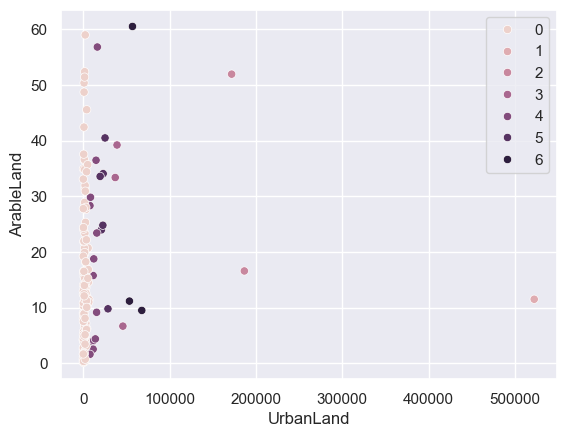

In [36]:
# Plotting our data
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="UrbanLand", y="ArableLand", hue=clust2, data=df)
plt.show()
